In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
db = pd.read_csv("vigencias_scores.csv")

In [4]:
db

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral,rank
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000,ruim
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685,regular
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,otimo
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814,otimo
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403,bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,65042,3922,394861.0,3922.0,45.261,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,otimo
12638,22689,3327,636609.0,2950.0,433.054,0.0,0.0,0.0,2.0,0.0,...,1.0,2858.0,728.0,416.0,0.0,0.0,0.0,0.0,47.228983,ruim
12639,24403,2870,636570.0,2950.0,185.515,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5213.0,0.0,0.0,0.0,0.0,50.000000,ruim
12640,9853,2868,636811.0,2950.0,451.450,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.354746,otimo


In [6]:
from sklearn import preprocessing

categ_encod = preprocessing.LabelEncoder()

db["rank"] = categ_encod.fit_transform(db["rank"])

db["rank"]

0        4
1        3
2        1
3        1
4        0
        ..
12637    1
12638    4
12639    4
12640    1
12641    1
Name: rank, Length: 12642, dtype: int64

In [9]:
y = db["rank"]
X = db.drop(["rank"], axis = 1)

In [10]:
y

0        4
1        3
2        1
3        1
4        0
        ..
12637    1
12638    4
12639    4
12640    1
12641    1
Name: rank, Length: 12642, dtype: int64

In [11]:
X

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,65042,3922,394861.0,3922.0,45.261,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
12638,22689,3327,636609.0,2950.0,433.054,0.0,0.0,0.0,2.0,0.0,...,2.0,1.0,2858.0,728.0,416.0,0.0,0.0,0.0,0.0,47.228983
12639,24403,2870,636570.0,2950.0,185.515,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,0.0,0.0,5213.0,0.0,0.0,0.0,0.0,50.000000
12640,9853,2868,636811.0,2950.0,451.450,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.354746


In [18]:
X.shape

(12642, 26)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
print(pca.components_)

[[ 1.24108747e-01  6.03887142e-03 -9.92237632e-01 -4.45499037e-03
  -1.31710963e-03 -1.13573294e-05  1.68241829e-08 -6.41225132e-08
  -1.14104120e-05 -1.38971348e-06  5.26037673e-07  6.10642773e-08
   2.75686064e-06  9.31334907e-05  1.56600344e-05 -1.19178016e-05
  -3.42339563e-06 -6.23489232e-06 -6.08195264e-04 -3.58259488e-04
  -1.71426036e-03 -5.21827979e-09 -4.75209556e-08 -1.74114833e-07
  -7.25751089e-09  6.98457744e-05]
 [-9.92163453e-01  8.90998807e-03 -1.24005023e-01 -1.12341662e-02
   6.39124322e-04 -7.52924099e-05  3.21423868e-07  2.69147679e-07
   1.00021207e-05  1.51734143e-05  1.40883373e-06  2.80564603e-07
  -3.06086841e-05  1.05785854e-04  7.89523870e-05  3.70013535e-06
   1.75754927e-06  7.10334534e-06  4.14572848e-05  5.39653762e-04
   5.30217968e-03 -9.20351680e-08 -8.76440360e-07 -2.25347722e-06
  -9.87371994e-08 -5.34747881e-05]
 [-5.21714395e-03 -4.97915248e-01 -7.19732604e-03  4.87179031e-01
   4.39755608e-02  8.57500986e-04  1.22313566e-05  3.36392215e-06
   2.8

In [46]:
print(pca.explained_variance_)

[1.21532635e+10 3.00499041e+08 9.91494020e+05]


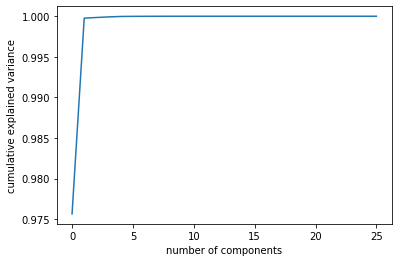

In [47]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [55]:
pca = PCA().fit_transform(X)
pca

array([[-1.00716801e+05, -3.81814857e+04,  6.79378656e+02, ...,
        -6.05092557e-04, -4.57973164e-04,  1.39308569e-03],
       [-1.07957537e+05,  1.96878777e+04, -2.98053988e+02, ...,
         5.99553230e-04,  5.59457285e-03,  3.32660619e-03],
       [-1.07712723e+05,  1.92933385e+04, -2.98879939e+02, ...,
        -1.81635743e-04,  4.08557963e-03,  1.67441705e-03],
       ...,
       [-1.05738451e+05,  3.61766003e+03,  3.56607662e+03, ...,
        -2.87148985e-03, -7.85834955e-04,  3.44315986e-03],
       [-1.07774786e+05,  1.79962626e+04, -6.67655873e+01, ...,
         3.95707866e-03,  4.36868695e-04, -3.81491766e-04],
       [-1.07506686e+05,  1.72638888e+04, -7.48870606e+01, ...,
         1.08836909e-03,  6.74538891e-04,  3.74391671e-04]])

In [50]:
pca.get_precision() #matrix confusion pca

array([[ 3.64736960e-09,  9.17405664e-09,  4.76339978e-10,
        -1.36029962e-08,  6.41236679e-08, -5.01508071e-07,
         2.07587339e-08,  5.49626815e-06,  3.91367162e-07,
         3.32571143e-07,  2.60088282e-06, -5.19789720e-06,
        -1.62980802e-08, -2.17648747e-08,  4.38446745e-08,
        -8.69631015e-08, -1.05171224e-06, -6.48114852e-07,
        -2.85595712e-09,  5.42016199e-09,  6.24850470e-09,
        -2.65416449e-05, -2.67086071e-06, -5.55848342e-06,
        -1.64622015e-05, -7.95531170e-09],
       [ 9.17405664e-09,  1.36329386e-06,  6.56387892e-09,
         1.92818580e-07,  1.03936199e-06,  1.08113784e-05,
        -1.57725329e-05,  3.18782143e-04,  7.48309206e-06,
        -1.44633789e-05, -3.36751787e-05,  1.04194720e-04,
         9.02371985e-08, -3.97166056e-07, -2.96574961e-07,
        -6.23469687e-06, -1.72004586e-05, -4.24580543e-06,
        -9.27008233e-08, -1.55735688e-09, -1.36292777e-08,
         3.98706184e-04,  9.55218253e-05, -3.50625498e-05,
        -1.35